In [211]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [212]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("data/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [213]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data


In [214]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file\
features = market_data_df.select_dtypes(include=['float64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [215]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_market_data_df.sample(n=5)

# Copy the crypto names from the original data
coin_ids = market_data_df.index

# Set the coinid column as index
#! coin_id is already the index
scaled_market_data_df=scaled_market_data_df.set_index(coin_ids)

# Display sample data
scaled_market_data_df.sample(n=5)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
crypto-com-chain,0.331280,-1.614844,-1.054521,-0.729931,-0.350155,-0.022866,-0.034570
cdai,0.180851,-0.704931,-0.001816,-0.143237,0.016060,-0.551146,-0.282310
tron,0.130050,-0.041018,0.147155,-0.543776,0.120116,-0.241118,-0.234014
leo-token,0.051758,-0.928381,-0.871918,0.058782,-0.159250,-0.512071,-0.265036
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625


<!-- ### Find the Best Value for k Using the Original Scaled DataFrame. -->


**Verify correct index placement**


In [216]:
scaled_market_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [217]:
market_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [218]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_range = range(1,11)


# Create an empty list to store the inertia values
wcss = [] # within-cluster sum of square

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_range:
  cluster = KMeans(n_clusters=k, random_state=42)
  cluster = cluster.fit(scaled_market_data_df)
  wcss.append(cluster.inertia_)

# Create a dictionary with the data to plot the Elbow curve
interias = {'k': list(k_range), 'inertia': wcss}
print(interias)

# Create a DataFrame with the data to plot the Elbow curve
interias_df = pd.DataFrame(interias)

# Display the DataFrame
interias_df

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'inertia': [287.0, 212.1233420748626, 170.19357087970297, 79.02243535120977, 71.0979135124442, 66.1088267804475, 54.488123156241166, 43.224692666580424, 32.86088447122681, 28.404884636873092]}


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


<Axes: xlabel='k'>

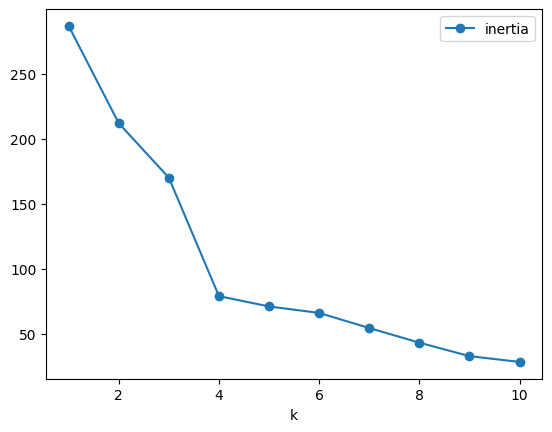

In [219]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
interias_df.plot(kind='line', marker='o', x='k', y='inertia')

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

**Proof:** Setting k_range to 1,5 still return the graph with the bend starting at 4


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.


In [220]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=42, init='k-means++')

In [221]:
# Fit the K-Means model using the scaled data
"""
  The instructions in this cell do not match the instructions in the module Requirements
"""
k_model = k_model.fit(scaled_market_data_df)

In [222]:
# Predict the clusters to group the cryptocurrencies using the scaled data
augury = k_model.predict(scaled_market_data_df)

# View the resulting array of cluster values.
print(augury)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [223]:
# Create a copy of the DataFrame
scaled_market_data_df_copy = scaled_market_data_df.copy()

In [224]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_data_df_copy['cluster'] = augury

# Display sample data
scaled_market_data_df_copy.sample(n=5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
cdai,0.180851,-0.704931,-0.001816,-0.143237,0.016060,-0.551146,-0.282310,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

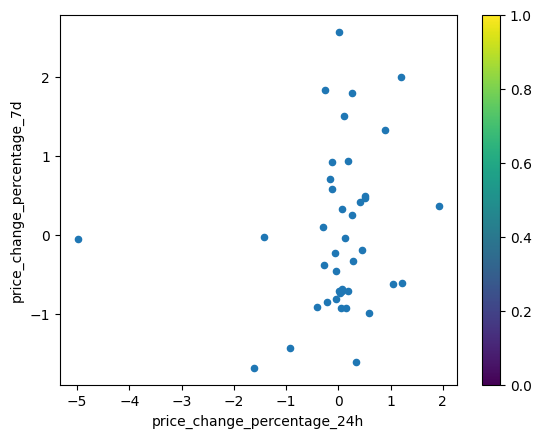

In [225]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_market_data_df.plot(x="price_change_percentage_24h", y="price_change_percentage_7d", kind='scatter', colorbar='rainbow')

### Optimize Clusters with Principal Component Analysis.


In [226]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3, random_state=42)

In [227]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_fitted_market_data_df = pd.DataFrame(pca.fit_transform(scaled_market_data_df))

# View the first five rows of the DataFrame.
pca_fitted_market_data_df.head(5)

,0,1,2
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [228]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
variance = pca.explained_variance_ratio_
total_varience = variance.sum()
print(variance)
print(total_varience)

[0.3719856  0.34700813 0.17603793]
0.8950316570309842


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** .895 > 89.5%


In [229]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_fitted_market_data_df)
pca_df = pca_df.set_axis(coin_ids)
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
pca_df.sample(n=5)

,0,1,2
coin_id,,,
eos,-0.693425,-0.473815,-0.527597
stellar,-0.489015,-0.732719,-0.062543
litecoin,-0.649468,0.432165,0.600303
zcash,-0.425147,0.492976,1.058048
neo,-0.362120,-0.986914,-0.728752


### Find the Best Value for k Using the PCA Data


In [230]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
pca_k_range = range(1,11)

# Create an empty list to store the inertia values
pca_wcss = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in pca_k_range:
    kluster = KMeans(n_clusters=k, random_state=42)
    kluster = kluster.fit(pca_df)
    pca_wcss.append(kluster.inertia_)
    
# Create a dictionary with the data to plot the Elbow curve
pca_interias = {'k': list(pca_k_range), 'inertia': pca_wcss}

# Create a DataFrame with the data to plot the Elbow curve
pca_interias_df = pd.DataFrame(pca_interias)

# Display the DataFrame
pca_interias_df

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


<Axes: xlabel='k'>

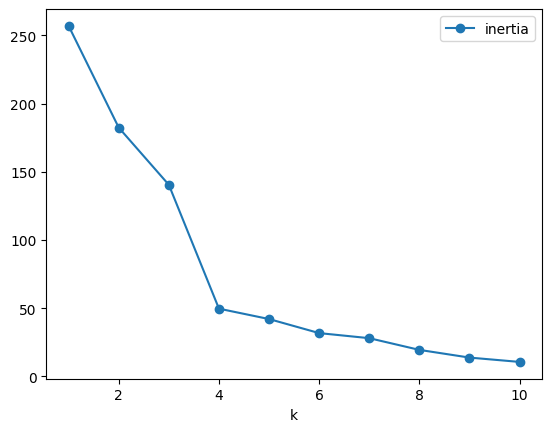

In [231]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_interias_df.plot(kind='line', marker='o', x='k', y='inertia')

#### Answer the following questions:

- **Question:** What is the best value for `k` when using the PCA data?

  - **Answer:** 4

- **Question:** Does it differ from the best k value found using the original data?

  - **Answer:** Nope


### Cluster Cryptocurrencies with K-means Using the PCA Data


In [232]:
# Initialize the K-Means model using the best value for k
pca_k_model = KMeans(n_clusters=4, random_state=42, init='k-means++')

In [233]:
# Fit the K-Means model using the PCA data
pca_k_model = pca_k_model.fit(pca_interias_df)

In [234]:
# Predict the clusters to group the cryptocurrencies using the PCA data
augury = pca_k_model.predict(pca_interias_df)

# Print the resulting array of cluster values.
print(augury)

[2 1 1 0 0 0 3 3 3 3]


In [235]:
# Create a copy of the DataFrame with the PCA data
pca_interias_df_copy = pca_interias_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_interias_df_copy['kluster'] = augury


# Display sample data
pca_interias_df_copy.sample(n=5)

,k,inertia,kluster
7,8,19.451747,3
2,3,140.431833,1
0,1,256.874086,2
6,7,28.031869,3
1,2,182.339530,1


Axes(0.125,0.11;0.775x0.77)


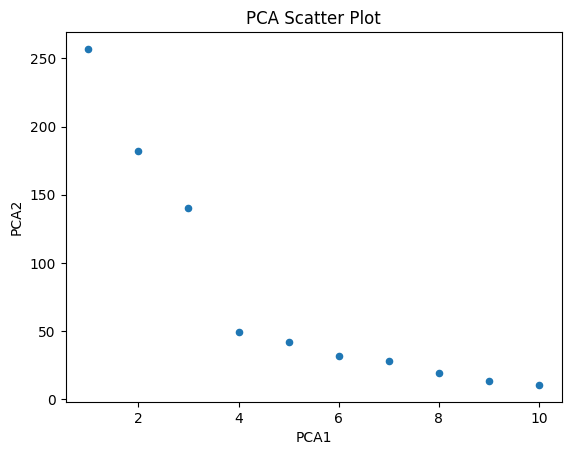

In [246]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
scatter = pca_interias_df_copy.plot(
  kind='scatter',
  x='k', 
  y='inertia',
  title='PCA Scatter Plot',
  xlabel='PCA1',
  ylabel='PCA2'
)

print(scatter)

### Determine the Weights of Each Feature on each Principal Component


In [237]:
# Use the columns from the original scaled DataFrame as the index.

#### Answer the following question:

- **Question:** Which features have the strongest positive or negative influence on each component?

- **Answer:**
